In [1]:
import numpy as np

vertices of an icosahedron from https://en.wikibooks.org/wiki/Geodesic_Grids/Base_polyhedra

In [6]:
h = 1/np.sqrt(5)
xp = 1/2. + np.sqrt(5)/10
xm = 1/2. - np.sqrt(5)/10
isovertices = np.array([
    [0,0,1],
    [-2 * h, 0, h],
    [xp, np.sqrt(xm), h],
    [-1 * xm, -1 * np.sqrt(xp), h ],
    [-1 * xm,  np.sqrt(xp), h ],
    [xp, -1 * np.sqrt(xm), h],
    
    
])

isovertices = np.concatenate((isovertices, -1.0 * isovertices), axis = 0)
print(isovertices)

[[ 0.          0.          1.        ]
 [-0.89442719  0.          0.4472136 ]
 [ 0.7236068   0.52573111  0.4472136 ]
 [-0.2763932  -0.85065081  0.4472136 ]
 [-0.2763932   0.85065081  0.4472136 ]
 [ 0.7236068  -0.52573111  0.4472136 ]
 [-0.         -0.         -1.        ]
 [ 0.89442719 -0.         -0.4472136 ]
 [-0.7236068  -0.52573111 -0.4472136 ]
 [ 0.2763932   0.85065081 -0.4472136 ]
 [ 0.2763932  -0.85065081 -0.4472136 ]
 [-0.7236068   0.52573111 -0.4472136 ]]


In [7]:
from scipy.spatial import ConvexHull

In [77]:
hull = ConvexHull(isovertices)
print(hull)

Does indeed have 20 faces

In [78]:
hull.simplices.shape
hull.simplices
isovertices[hull.simplices]

array([[[ 0.        ,  0.        ,  1.        ],
        [-0.2763932 ,  0.85065081,  0.4472136 ],
        [-0.89442719,  0.        ,  0.4472136 ]],

       [[-0.2763932 , -0.85065081,  0.4472136 ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.89442719,  0.        ,  0.4472136 ]],

       [[ 0.7236068 ,  0.52573111,  0.4472136 ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.2763932 ,  0.85065081,  0.4472136 ]],

       [[-0.7236068 ,  0.52573111, -0.4472136 ],
        [-0.2763932 ,  0.85065081,  0.4472136 ],
        [-0.89442719,  0.        ,  0.4472136 ]],

       [[ 0.2763932 , -0.85065081, -0.4472136 ],
        [-0.        , -0.        , -1.        ],
        [ 0.89442719, -0.        , -0.4472136 ]],

       [[ 0.2763932 ,  0.85065081, -0.4472136 ],
        [ 0.7236068 ,  0.52573111,  0.4472136 ],
        [-0.2763932 ,  0.85065081,  0.4472136 ]],

       [[ 0.2763932 ,  0.85065081, -0.4472136 ],
        [-0.        , -0.        , -1.        ],
        

<IPython.core.display.Javascript object>


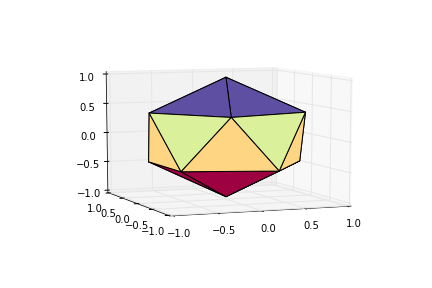

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = isovertices[:,0]
y = isovertices[:,1]
z = isovertices[:,2]
# The triangles in parameter space determine which x, y, z points are
# connected by an edge
#ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.plot_trisurf(x, y, z, triangles=hull.simplices, cmap=plt.cm.Spectral)


In [17]:
def plotsimplices(triangles, vertices):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    x = vertices[:,0]
    y = vertices[:,1]
    z = vertices[:,2]
    # The triangles in parameter space determine which x, y, z points are
    # connected by an edge
    #ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
    ax.plot_trisurf(x, y, z, triangles=triangles, cmap=plt.cm.Spectral)
    

<IPython.core.display.Javascript object>


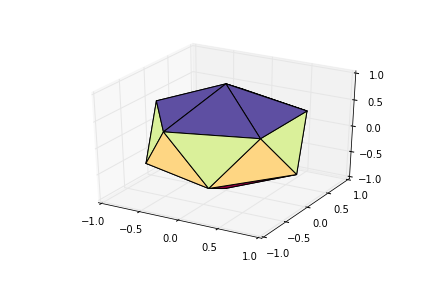

In [18]:
plotsimplices(hull.simplices, isovertices)

[[ 0.          0.          1.        ]
 [-0.89442719  0.          0.4472136 ]
 [ 0.7236068   0.52573111  0.4472136 ]
 [-0.2763932  -0.85065081  0.4472136 ]
 [-0.2763932   0.85065081  0.4472136 ]
 [ 0.7236068  -0.52573111  0.4472136 ]
 [-0.         -0.         -1.        ]
 [ 0.89442719 -0.         -0.4472136 ]
 [-0.7236068  -0.52573111 -0.4472136 ]
 [ 0.2763932   0.85065081 -0.4472136 ]
 [ 0.2763932  -0.85065081 -0.4472136 ]
 [-0.7236068   0.52573111 -0.4472136 ]
 [-0.16245985  0.5         0.85065081]
 [-0.68819096  0.5         0.52573111]
 [-0.52573111  0.          0.85065081]
 [-0.16245985 -0.5         0.85065081]
 [-0.52573111  0.          0.85065081]
 [-0.68819096 -0.5         0.52573111]
 [ 0.4253254   0.30901699  0.85065081]
 [-0.16245985  0.5         0.85065081]
 [ 0.26286556  0.80901699  0.52573111]
 [-0.58778525  0.80901699  0.        ]
 [-0.68819096  0.5         0.52573111]
 [-0.95105652  0.30901699  0.        ]
 [ 0.16245985 -0.5        -0.85065081]
 [ 0.52573111 -0.        

<IPython.core.display.Javascript object>


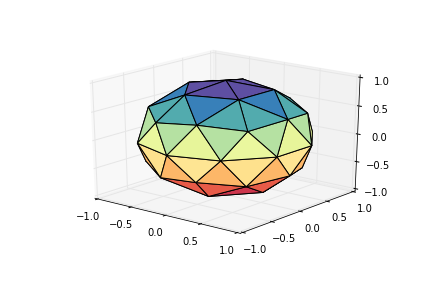

In [27]:
def sphericalmidpoint(a,b):
    return (a + b)/ np.linalg.norm(a+b)

def subdivide(triangles, vertices):
    newvertices = np.copy(vertices)
    for triangle in triangles:
        v0 = vertices[triangle[0]]
        v1 = vertices[triangle[1]]
        v2 = vertices[triangle[2]]
        #print(v0)
        #print(newvertices)
        newvertices = np.append(newvertices, [sphericalmidpoint(v0,v1)] ,axis = 0 )
        newvertices = np.append(newvertices, [sphericalmidpoint(v1,v2) ],axis = 0)
        newvertices = np.append(newvertices, [sphericalmidpoint(v0,v2)] ,axis = 0)


    return newvertices

subverts = subdivide(hull.simplices, isovertices)
print(subverts)
hull2 = ConvexHull(subverts)
plotsimplices(hull2.simplices, subverts)
        
    

<IPython.core.display.Javascript object>


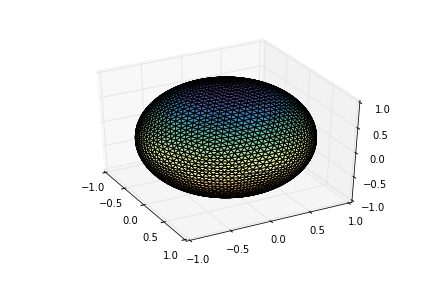

In [28]:
hull2 = hull
subverts = isovertices
for i in range(4):
    subverts = subdivide(hull2.simplices, subverts)
    hull2 = ConvexHull(subverts)


plotsimplices(hull2.simplices, subverts)

In [29]:
print(hull2.simplices.shape)

(5120, 3)


In [30]:
from scipy import sparse

In [32]:
numverts =  hull2.simplices.shape[0]
A = sparse.lil_matrix((numverts, numverts))

In [34]:
t = 0.5
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        A[a,b] = t
        A[b,a] = t


In [35]:
t = 0.5
eps = 
K = np.zeros((numverts, numverts))
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        K[a,b] = t
        K[b,a] = t


In [36]:
from scipy import linalg

In [37]:
energies = linalg.eigvalsh(K)

the first most obvious thing to plot is a histogram of energies.
I'd prefer some kind of dispersion relation, but how?

<IPython.core.display.Javascript object>


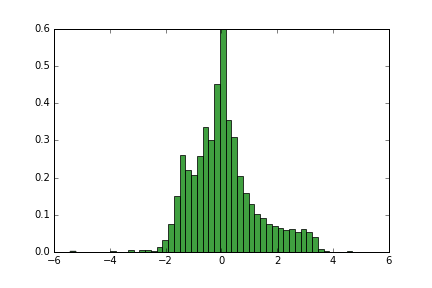

In [38]:
n, bins, patches = plt.hist(energies, 50, normed=1, facecolor='green', alpha=0.75)

It is interesting that appearently we have a discrete spectrum. Is thsi the quantization expected from angular momentum  ?


<IPython.core.display.Javascript object>


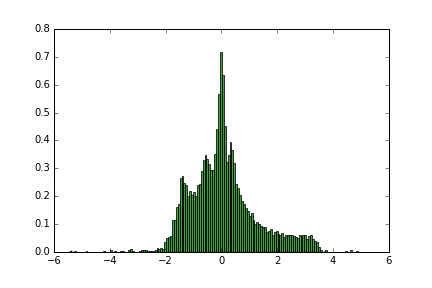

In [40]:
n, bins, patches = plt.hist(energies, 150, normed=1, facecolor='green', alpha=0.75)

<IPython.core.display.Javascript object>


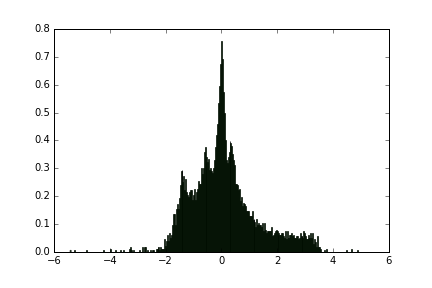

In [41]:
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)

In [39]:
np.min(energies)


-5.4201290007333869

In [52]:
t = 0.5
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(subverts[a],subverts[b]))
        K[a,b] = t/l/l
        K[b,a] = t/l/l
energies = linalg.eigvalsh(K)


<IPython.core.display.Javascript object>


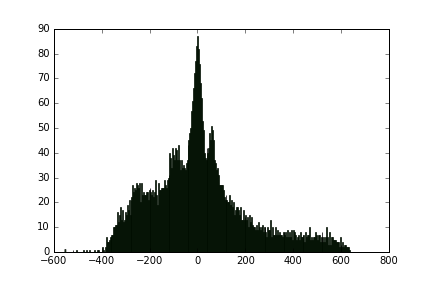

In [54]:
n, bins, patches = plt.hist(energies, 300, facecolor='green', alpha=0.75)

<IPython.core.display.Javascript object>


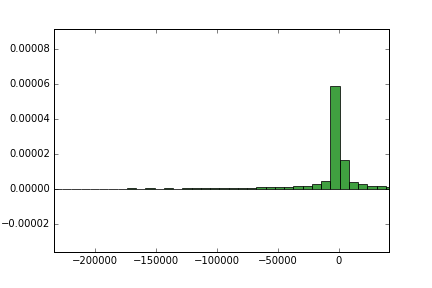

In [47]:
t = 0.5
K = np.zeros((numverts, numverts))
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        K[a,b] = t
        K[b,a] = t
        K[a,a] += -1 * t 
        K[b,b] += -1 * t 
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)

In [48]:
energies[0:10]

array([-1105116.85246669, -1089766.9438229 , -1072131.23462349,
       -1045393.48788299,  -958703.09664715,  -905146.65317755,
        -890263.3315535 ,  -828070.2502685 ,  -822066.33556573,
        -792531.68083487])

In [51]:
triangle = hull2.simplices[0]

a = triangle[1]
b = triangle[2]
print(a)
print(b)
l = np.arccos(np.dot(a,b))
print(l)

3708
3713
nan


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in arccos


<IPython.core.display.Javascript object>


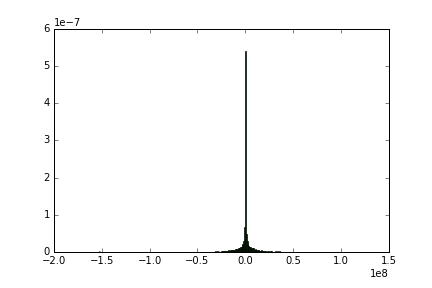

In [55]:
t = 0.5
K = np.zeros((numverts, numverts))
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(subverts[a],subverts[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] += -1 * amp 
        K[b,b] += -1 * amp 
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)

In [57]:
print(energies[np.abs(energies) < 20])

[-18.29400182 -15.04669311 -11.60527187  -6.04625598  -2.03105183
   0.91575182   2.22724721   5.20792438   7.93601678  11.26284764
  16.37707032]


In [ ]:
Actually I may be cou

<IPython.core.display.Javascript object>


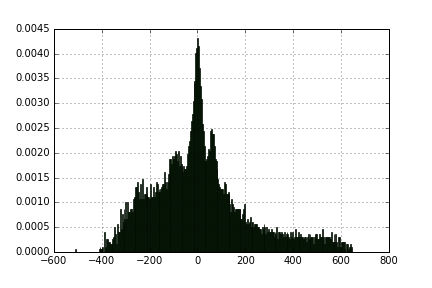

[ -1.99539171e+01  -1.98993473e+01  -1.98565566e+01  -1.97760312e+01
  -1.97405337e+01  -1.96642087e+01  -1.96215674e+01  -1.95062282e+01
  -1.94742939e+01  -1.94236666e+01  -1.92605665e+01  -1.92365029e+01
  -1.91858960e+01  -1.90894646e+01  -1.90438145e+01  -1.89812918e+01
  -1.89362444e+01  -1.88769529e+01  -1.88469228e+01  -1.86928158e+01
  -1.86756472e+01  -1.86059358e+01  -1.84827988e+01  -1.84632490e+01
  -1.83798160e+01  -1.82533053e+01  -1.81966596e+01  -1.81599985e+01
  -1.81325000e+01  -1.80864322e+01  -1.80389235e+01  -1.79889259e+01
  -1.79553077e+01  -1.78286551e+01  -1.77799151e+01  -1.77665107e+01
  -1.77309110e+01  -1.76394542e+01  -1.74783599e+01  -1.74094748e+01
  -1.73941874e+01  -1.73187155e+01  -1.72139419e+01  -1.71867507e+01
  -1.71027961e+01  -1.70413326e+01  -1.69745682e+01  -1.69057190e+01
  -1.67781716e+01  -1.67491418e+01  -1.67027776e+01  -1.66483443e+01
  -1.65535162e+01  -1.65240297e+01  -1.65099036e+01  -1.64189450e+01
  -1.64010978e+01  -1.62693357e+01

In [58]:
t = 0.5
K = np.zeros((numverts, numverts))
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(subverts[a],subverts[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        #K[a,a] += -1 * amp 
        #K[b,b] += -1 * amp 
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies[np.abs(energies) < 20])

In [60]:
print(energies[np.abs(energies) < 1])

[-0.97007285 -0.95751985 -0.90347296 -0.82053291 -0.76187916 -0.72200359
 -0.68150961 -0.6621034  -0.58755451 -0.55990551 -0.49149672 -0.43182979
 -0.39354956 -0.38888533 -0.33263427 -0.30036504 -0.20626525 -0.15338698
 -0.10893184 -0.07558412 -0.01403883  0.00305515  0.07171629  0.10778407
  0.11812213  0.1548264   0.17807753  0.2400454   0.30192206  0.34554062
  0.39589973  0.47141621  0.49928921  0.5383865   0.57318226  0.63608621
  0.65214667  0.6910948   0.72489606  0.76932835  0.82740639  0.85145978
  0.95485328  0.9813676 ]


In [71]:
t = 1.0
K = np.zeros((12, 12))
for triangle in  hull.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(isovertices[a],isovertices[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] = -5 * amp
        K[b,b] = -5 * amp
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies)

[-2.23210675 -2.23210675 -2.23210675 -1.22371233 -1.22371233 -1.22371233
 -1.22371233 -1.22371233  1.41629853  1.41629853  1.41629853  3.67113699]


Okay. I could conceive of this being correct. 1 0 eigenvalue. 3 l=1, 5 l=2, and then it goes bad. Fine. Although, the values of the eigenvalues... should be
0
-2
-6
Ok. Good. This roughly makes sense. (I guess one should not expect extreme similarity between the degeracies at this coarse level. These degeneracies reflect the symmettries of the icosahedal group rather than full rotation group)


<IPython.core.display.Javascript object>


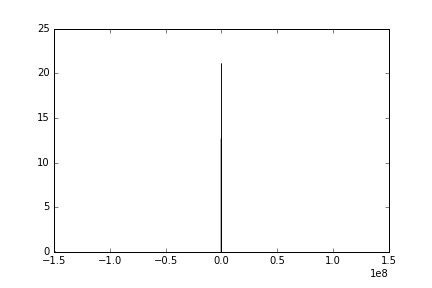

[-18.2985797  -15.96358454 -12.56168415  -9.24075808  -6.27539455
  -3.45833503  -0.94976204   1.10476595   4.7264091    8.5993983
  11.97730173  17.4580067 ]


In [69]:
t = 1.0
K = np.zeros((numverts, numverts))
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(subverts[a],subverts[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] += -1 * amp / 2.0 #each edge gets used twice
        K[b,b] += -1 * amp / 2.0
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies[np.abs(energies) < 20])

<IPython.core.display.Javascript object>


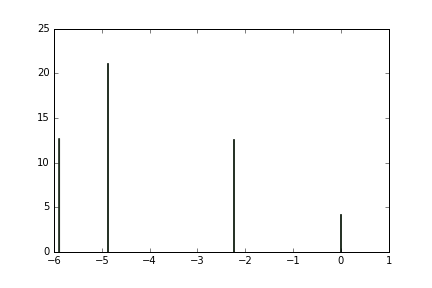

[ -5.90324374e+00  -5.90324374e+00  -5.90324374e+00  -4.89484932e+00
  -4.89484932e+00  -4.89484932e+00  -4.89484932e+00  -4.89484932e+00
  -2.25483846e+00  -2.25483846e+00  -2.25483846e+00   1.59594560e-15]


In [73]:
t = 1.0
K = np.zeros((12, 12))
for triangle in  hull.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(isovertices[a],isovertices[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] += -1 * amp / 2.0
        K[b,b] += -1 * amp / 2.0
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies)

<IPython.core.display.Javascript object>


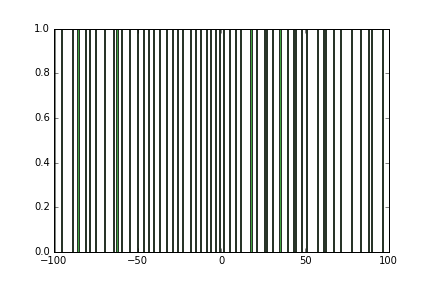

[-18.2985797  -15.96358454 -12.56168415  -9.24075808  -6.27539455
  -3.45833503  -0.94976204   1.10476595   4.7264091    8.5993983
  11.97730173  17.4580067 ]


In [74]:
t = 1.0
K = np.zeros((numverts, numverts))
for triangle in  hull2.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(subverts[a],subverts[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] += -1 * amp / 2.0 #each edge gets used twice
        K[b,b] += -1 * amp / 2.0
energies = linalg.eigvalsh(K)
n, bins, patches = plt.hist(energies, 300, range=(-100,100), facecolor='green', alpha=0.75)
print(energies[np.abs(energies) < 20])

Try a coarser mesh. Maybe we're running into a numerical issue?

[[ 0.          0.          1.        ]
 [-0.89442719  0.          0.4472136 ]
 [ 0.7236068   0.52573111  0.4472136 ]
 ..., 
 [ 0.46466321 -0.58369144  0.66587717]
 [ 0.40283501 -0.61918561  0.67404238]
 [ 0.42421922 -0.55337179  0.7168108 ]]


<IPython.core.display.Javascript object>


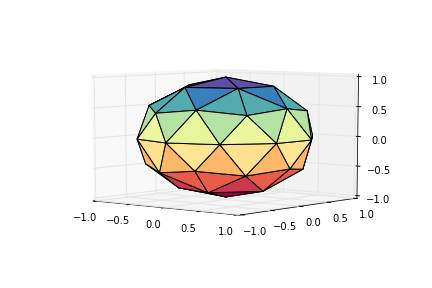

<IPython.core.display.Javascript object>


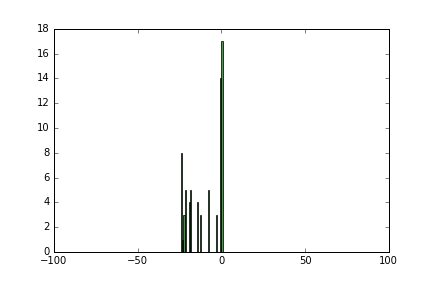

[[-16.31616441   0.           0.         ...,   0.           0.           0.        ]
 [  0.         -16.31616441   0.         ...,   0.           0.           0.        ]
 [  0.           0.         -16.31616441 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[ -1.91916137e+01  -1.91916137e+01  -1.91916137e+01  -1.91916137e+01
  -1.81728437e+01  -1.81728437e+01  -1.81728437e+01  -1.81728437e+01
  -1.81728437e+01  -1.41255545e+01  -1.41255545e+01  -1.41255545e+01
  -1.41255545e+01  -1.23565223e+01  -1.23565223e+01  -1.23565223e+01
  -7.58714734e+00  -7.58714734e+00  -7.58714734e+00  -7.58714734e+00
  -7.58714734e+00  -2.77227394e+00  -2.77227394e+00  -2.77227394e+00
  -1.30267087e-14  -8.51192021e-15  -7.14100536e-15  -4.696578

In [84]:
subverts3 = subdivide(hull.simplices, isovertices)
print(subverts)
hull3 = ConvexHull(subverts3)
numverts3 = subverts3.shape[0]
t = 1.0
K = np.zeros((numverts3, numverts3))
for triangle in  hull3.simplices:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        l = np.arccos(np.dot(subverts3[a],subverts3[b]))   
        amp = t/l/l
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] += -1 * amp / 2.0 #each edge gets used twice
        K[b,b] += -1 * amp / 2.0
energies = linalg.eigvalsh(K)
plotsimplices(hull3.simplices, subverts3)
plt.figure()
n, bins, patches = plt.hist(energies, 300, range=(-100,100), facecolor='green', alpha=0.75)
print(K)
print(energies[np.abs(energies) < 20])

[[ 0.          0.          1.        ]
 [-0.89442719  0.          0.4472136 ]
 [ 0.7236068   0.52573111  0.4472136 ]
 ..., 
 [ 0.46466321 -0.58369144  0.66587717]
 [ 0.40283501 -0.61918561  0.67404238]
 [ 0.42421922 -0.55337179  0.7168108 ]]


<IPython.core.display.Javascript object>


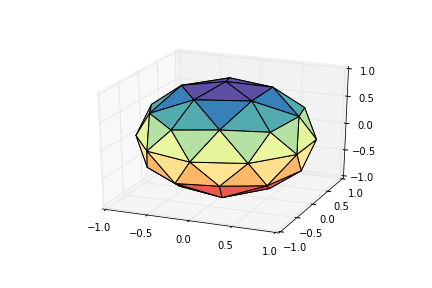

<IPython.core.display.Javascript object>


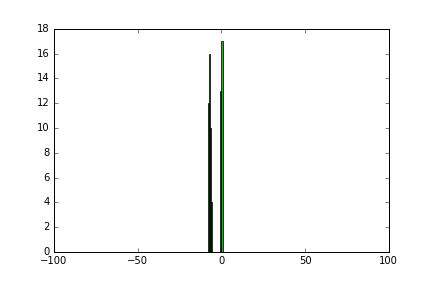

[[-6.96500725  0.          0.         ...,  0.          0.          0.        ]
 [ 0.         -6.96500725  0.         ...,  0.          0.          0.        ]
 [ 0.          0.         -6.96500725 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[ -7.66005502e+00  -7.63599098e+00  -7.61005239e+00  -7.58097843e+00
  -7.57597687e+00  -7.57020431e+00  -7.56502054e+00  -7.55636980e+00
  -7.55525892e+00  -7.55072688e+00  -7.54905062e+00  -7.52795017e+00
  -7.28273557e+00  -7.26409590e+00  -7.24047888e+00  -7.22465006e+00
  -7.20200076e+00  -7.07100531e+00  -7.05356390e+00  -7.05065740e+00
  -7.04445114e+00  -7.03222481e+00  -7.01338318e+00  -7.00154887e+00
  -6.99867154e+00  -6.98425600e+00  -6.69236767e+00  -6.67943285e+00
  -6.64605738e+00  -6.6169997

In [88]:
subverts3 = subdivide(hull.simplices, isovertices)
print(subverts)
hull3 = ConvexHull(subverts3)
numverts3 = subverts3.shape[0]
t = 1.0
K = np.zeros((numverts3, numverts3))
for triangle in  hull3.simplices:
    for i in range(3):
        a = subverts3[triangle[i-1]]
        b = subverts3[triangle[i]]
        c = subverts3[triangle[i-2]]
        area = np.linalg.norm(np.cross(a-b, b-c))/2.0
        
        perpbc = np.cross(b,c)
        perpac = np.cross(a,c)
        # these are the orthognal dropdowns from a and b respectively
        perpbc = perpbc / np.linalg.norm(perpbc)
        perpac = perpac / np.linalg.norm(perpac)
        #length of height of triangle
        adrop = np.dot(a,perpbc)
        bdrop = np.dot(b,perpac)
        grada = 1/adrop * perpbc
        gradb = 1/bdrop * perpac
        
        amp = np.abs(np.dot(grada,gradb) * area)
        
        a = triangle[i-1]
        b = triangle[i]
        
        K[a,b] = amp
        K[b,a] = amp
        K[a,a] += -1.0/adrop/adrop * area #each edge gets used twice
        K[b,b] += -1.0/bdrop/bdrop * area
energies = linalg.eigvalsh(K)
plotsimplices(hull3.simplices, subverts3)
plt.figure()
n, bins, patches = plt.hist(energies, 300, range=(-100,100), facecolor='green', alpha=0.75)
print(K)
print(energies[np.abs(energies) < 20])

Oh man
https://www.cs.cmu.edu/~kmcrane/Projects/DGPDEC/
This is good stuff

YO


In [90]:
sp

NameError: name 'sp' is not defined